In [1]:
import pandas as pd
import numpy as np

# Data Visualisation Libraries
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'

# !pip install seaborn --upgrade
import seaborn as sns
sns.set_style('darkgrid')
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVR
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('ObesityDataSet_raw_data.csv')

# print('✔️ Dataset Imported Successfully!\n')
print('It contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df

It contains 2111 rows and 17 columns.


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
clean_df = df.drop(['FCVC','NCP','CH2O','FAF','TUE'],axis=1)

le = preprocessing.LabelEncoder()
clean_df['Gender'] = le.fit_transform(clean_df['Gender'])
clean_df['family_history_with_overweight'] = le.fit_transform(clean_df['family_history_with_overweight'])
clean_df['FAVC'] = le.fit_transform(clean_df['FAVC'])
clean_df['CAEC'] = le.fit_transform(clean_df['CAEC'])
clean_df['SMOKE'] = le.fit_transform(clean_df['SMOKE'])
clean_df['SCC'] = le.fit_transform(clean_df['SCC'])
clean_df['CALC'] = le.fit_transform(clean_df['CALC'])
clean_df['MTRANS'] = le.fit_transform(clean_df['MTRANS'])
clean_df['NObeyesdad'] = le.fit_transform(clean_df['NObeyesdad'])

clean_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2,0,0,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,2,1,1,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2,0,0,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,2,0,0,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,2,0,0,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,2,0,0,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,2,0,0,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,2,0,0,2,3,4


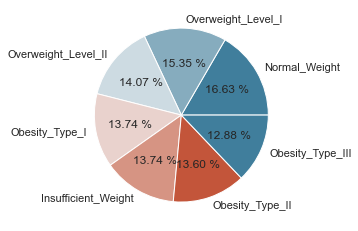

In [4]:
sns.set()
clean_df['NObeyesdad'].value_counts()
colors = sns.diverging_palette(230, 20)

plt.pie(clean_df['NObeyesdad'].value_counts(),labels = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II',
                                             'Obesity_Type_I','Insufficient_Weight','Obesity_Type_II',
                                            'Obesity_Type_III'],colors = colors,autopct  = '%.2f %%',)
plt.show()

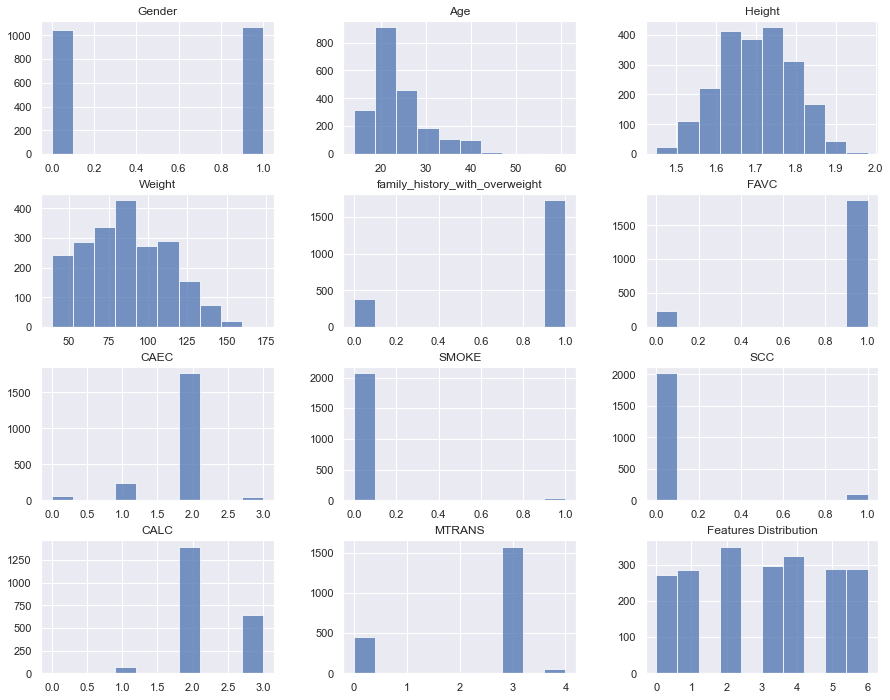

In [5]:
sns.set()
clean_df.hist(figsize=(15,12),alpha=0.75)
plt.title('Features Distribution')
plt.show()

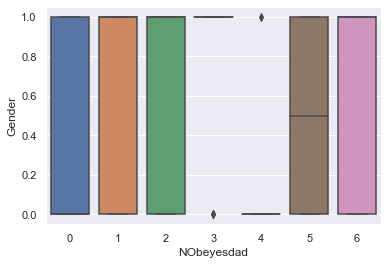

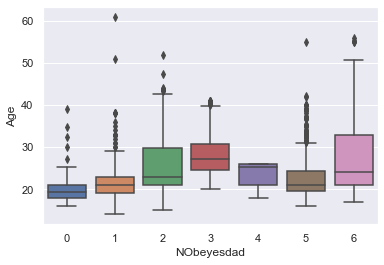

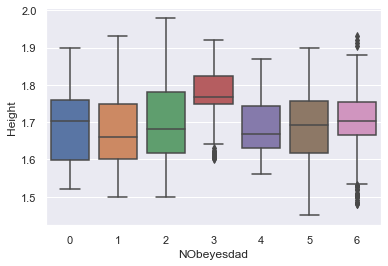

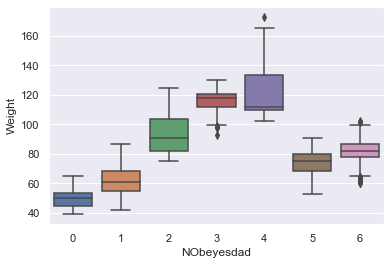

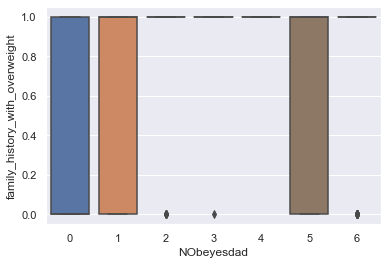

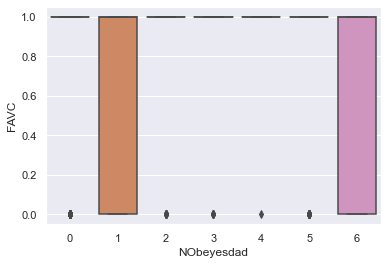

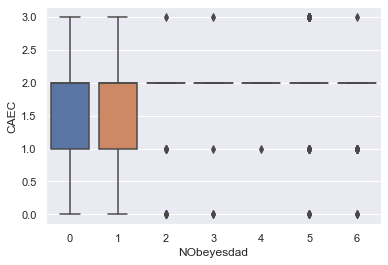

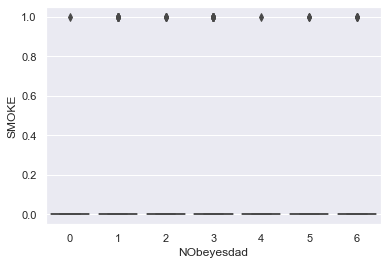

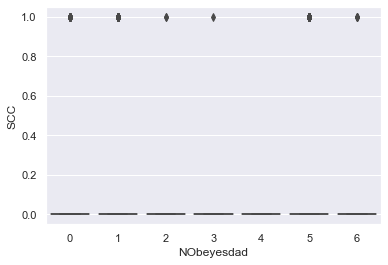

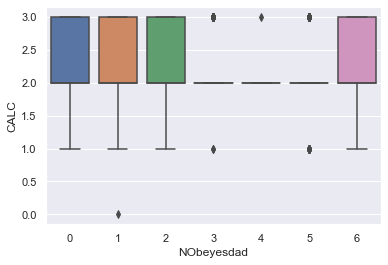

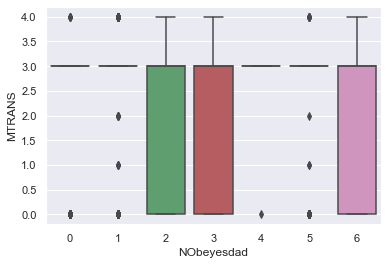

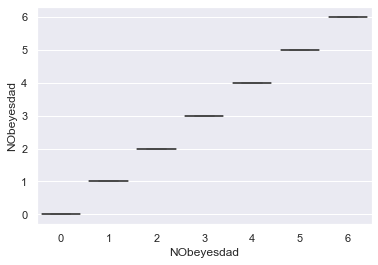

In [6]:
for i in range(0, len(clean_df.columns)):
    sns.boxplot(x=clean_df['NObeyesdad'],y=clean_df.iloc[:,i], data=df)
    colname=clean_df.columns[i]
    plt.ylabel(colname)
    plt.xlabel('NObeyesdad')
    plt.show()
    

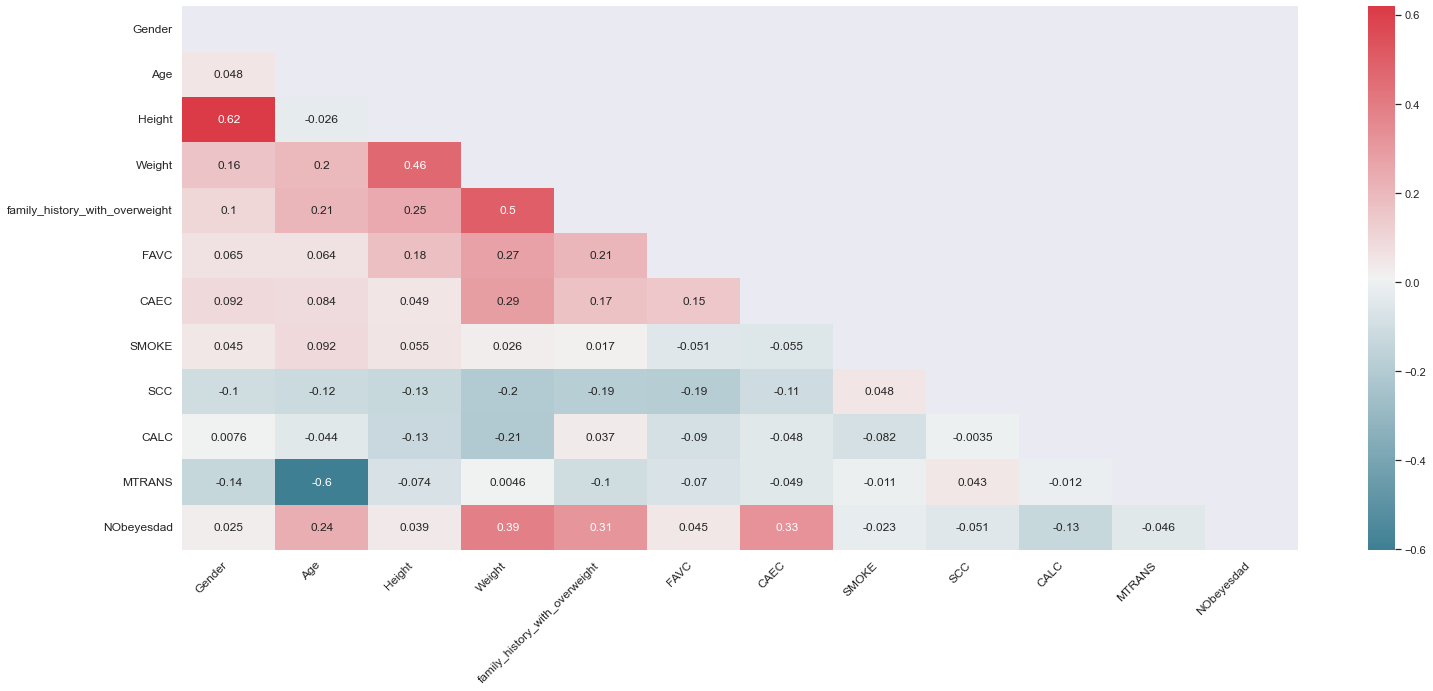

In [7]:
# Correlation between different variables
corr = clean_df.corr()

# Matplotlib plot configuration
fig, ax = plt.subplots(figsize=(25, 10))


# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True,  cmap=cmap, mask=mask)

# Set up a layout
#X axis
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=12
);
#Y axis
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=12
);

In [8]:
clean_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2,0,0,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,2,1,1,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2,0,0,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,2,0,0,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,2,0,0,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,2,0,0,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,2,0,0,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,2,0,0,2,3,4


In [10]:
clean_df[['Height','Weight']]=clean_df[['Height','Weight']].round(2)
clean_df['Age']=clean_df['Age'].astype(int)
clean_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,0,2,0,0,3,3,1
1,0,21,1.52,56.00,1,0,2,1,1,2,3,1
2,1,23,1.80,77.00,1,0,2,0,0,1,3,1
3,1,27,1.80,87.00,0,0,2,0,0,1,4,5
4,1,22,1.78,89.80,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.71,131.41,1,1,2,0,0,2,3,4
2107,0,21,1.75,133.74,1,1,2,0,0,2,3,4
2108,0,22,1.75,133.69,1,1,2,0,0,2,3,4
2109,0,24,1.74,133.35,1,1,2,0,0,2,3,4


In [12]:
scaler = preprocessing.MinMaxScaler()

clean_df[['Height','Weight','Age']] = scaler.fit_transform(clean_df[['Height','Weight','Age']])
clean_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,0,0.148936,0.320755,0.186567,1,0,2,0,0,3,3,1
1,0,0.148936,0.132075,0.126866,1,0,2,1,1,2,3,1
2,1,0.191489,0.660377,0.283582,1,0,2,0,0,1,3,1
3,1,0.276596,0.660377,0.358209,0,0,2,0,0,1,4,5
4,1,0.170213,0.622642,0.379104,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.127660,0.490566,0.689627,1,1,2,0,0,2,3,4
2107,0,0.148936,0.566038,0.707015,1,1,2,0,0,2,3,4
2108,0,0.170213,0.566038,0.706642,1,1,2,0,0,2,3,4
2109,0,0.212766,0.547170,0.704104,1,1,2,0,0,2,3,4


In [13]:
X=clean_df.drop(['NObeyesdad'], axis=1)
y=clean_df['NObeyesdad']

In [14]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=42)

In [15]:
# Trying decision tree
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
mse_clf = mean_squared_error(y_test, y_pred_clf)
print("RMSE using LASSO: ", np.sqrt(mse_clf))
print("LASSO R2 score :", r2_score(y_test,y_pred_clf))

RMSE using LASSO:  0.6727938132530018
LASSO R2 score : 0.8770786902108691


In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE using CLF: ", np.sqrt(mse_rf))
print("RF R2 score :", r2_score(y_test,y_pred_rf))

RMSE using CLF:  0.8059908263257171
RF R2 score : 0.8235899194239671


In [22]:
xgb = XGBClassifier() 
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test) 
mse_xgb = mean_squared_error(y_pred_xgb, y_test)
print("RMSE:" , np.sqrt(mse_xgb))
print("XGBoost R2 score :", r2_score(y_test,y_pred_xgb))

RMSE: 0.4351941398892446
XGBoost R2 score : 0.9485684896279787


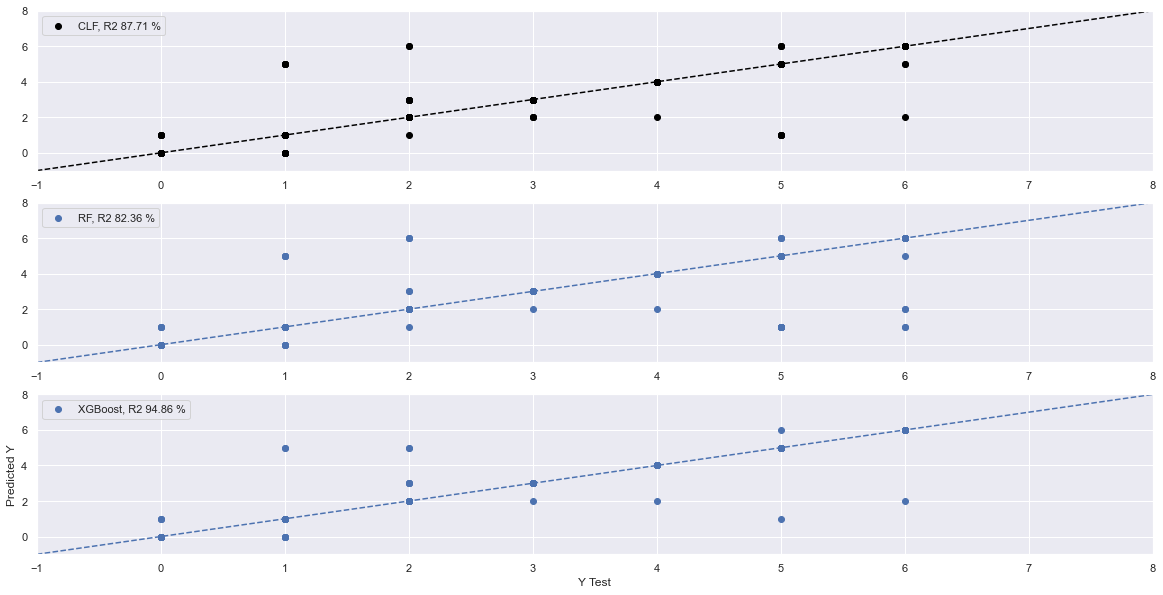

In [19]:
fig, ax = plt.subplots(3,1,figsize=(20,10))
sns.set()


ax[0].scatter(y_test, y_pred_clf, label='CLF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_clf)*100), color='black')
ax[0].plot([-1, 8],[-1, 8],linestyle='--', color='black')
ax[0].axis([-1, 8, -1, 8])
ax[0].legend(loc='upper left');


ax[1].scatter(y_test, y_pred_rf, label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf)*100))
ax[1].plot([-1, 8],[-1, 8],linestyle='--')
ax[1].axis([-1, 8, -1, 8])
ax[1].legend(loc='upper left');

ax[2].scatter(y_test, y_pred_xgb, label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
ax[2].plot([-1, 8],[-1, 8],linestyle='--')
ax[2].axis([-1, 8, -1, 8])
ax[2].legend(loc='upper left');


plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# plt.title('Obesity Regression by ML models')
# plt.legend(loc='cente');
plt.show()

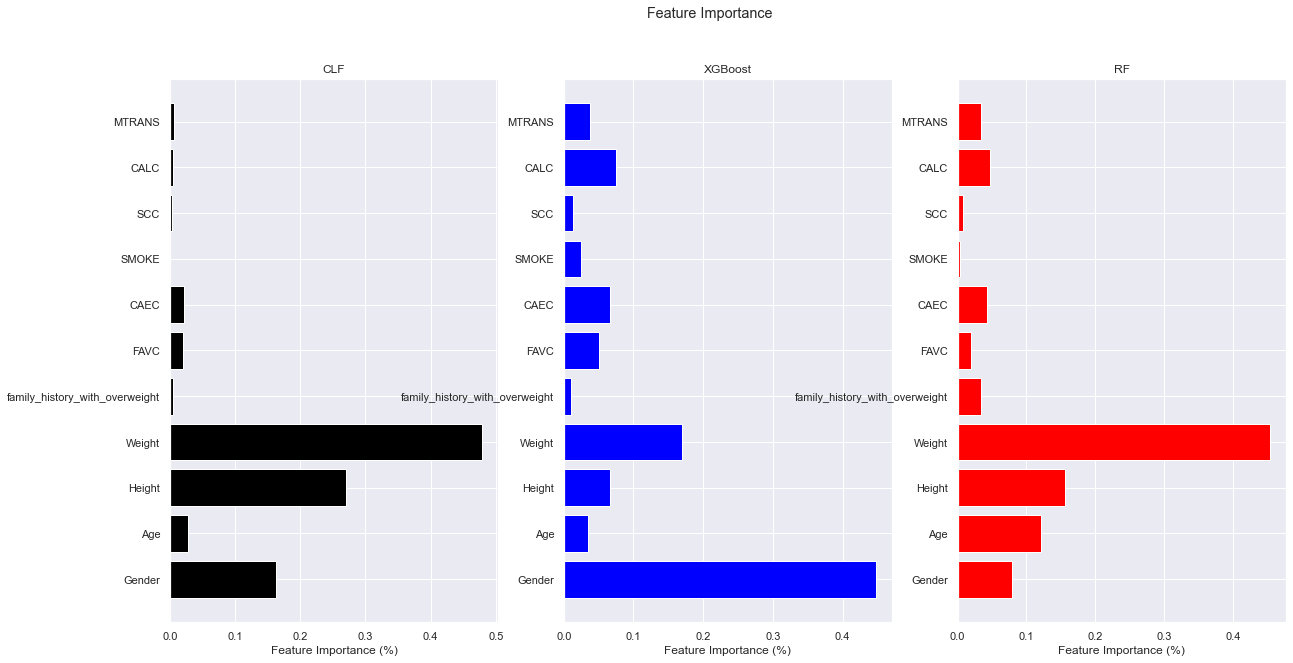

In [20]:
b=X.columns
fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].barh(b,clf.feature_importances_, label='CLF', color='black')
ax[0].set_title('CLF')
ax[0].set_xlabel('Feature Importance (%)')
ax[1].barh(b,xgb.feature_importances_, label='XGBoost', color='blue')
ax[1].set_title('XGBoost')
ax[1].set_xlabel('Feature Importance (%)')
ax[2].barh(b,rf.feature_importances_, label='RF', color='red')
ax[2].set_title('RF')
ax[2].set_xlabel('Feature Importance (%)')

plt.suptitle('Feature Importance')

plt.show()